# LGMVIP Task 1 - Iris Flowers Classification

## Importing the necessary libraries

In [523]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Loading the Iris dataset

In [524]:
df0 = pd.read_csv("iris.data", header=None)
header_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df0.to_csv("Iris.csv", header=header_list, index=False)
df = pd.read_csv("Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA - Data Summarization

In [525]:
df.shape

(150, 5)

In [526]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [527]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [529]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [530]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [531]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## EDA - Data Visualization

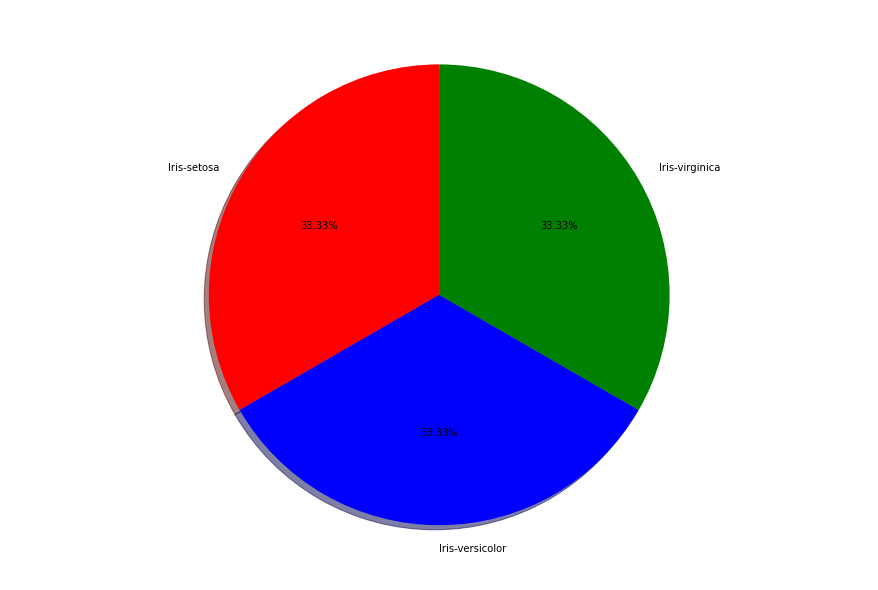

In [532]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['red','blue','green']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
plt.show()

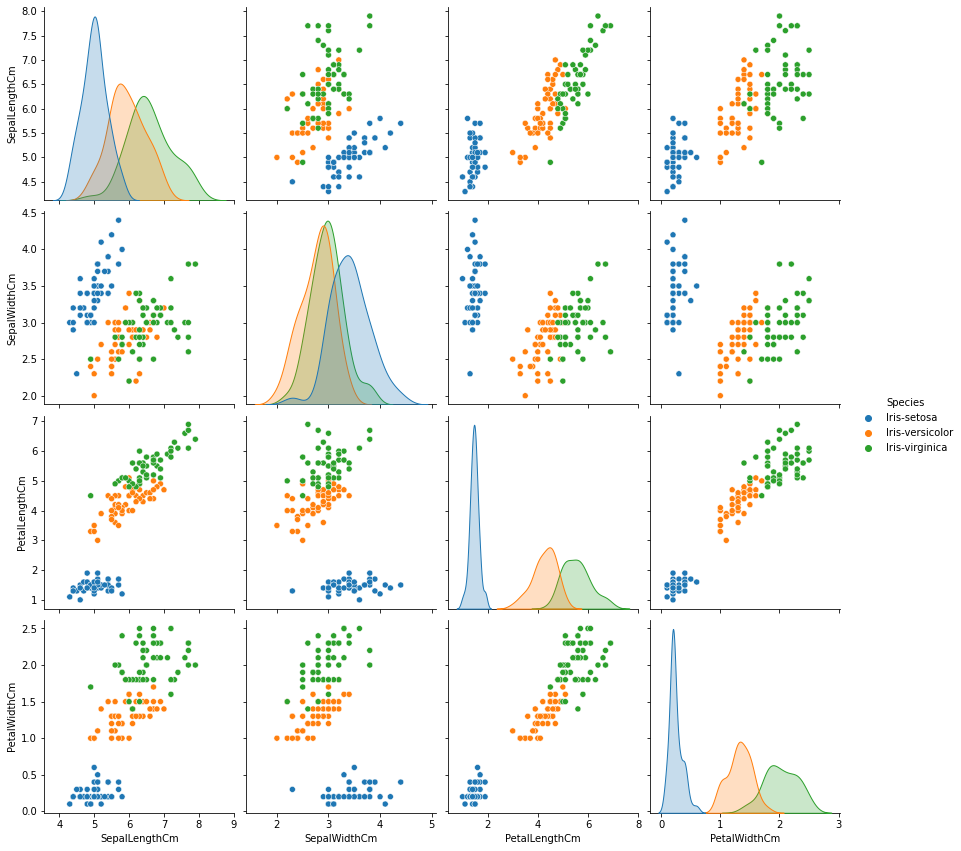

In [533]:
sns.pairplot(df, hue='Species', size=3)
plt.show()

### Box and Whisker Plot

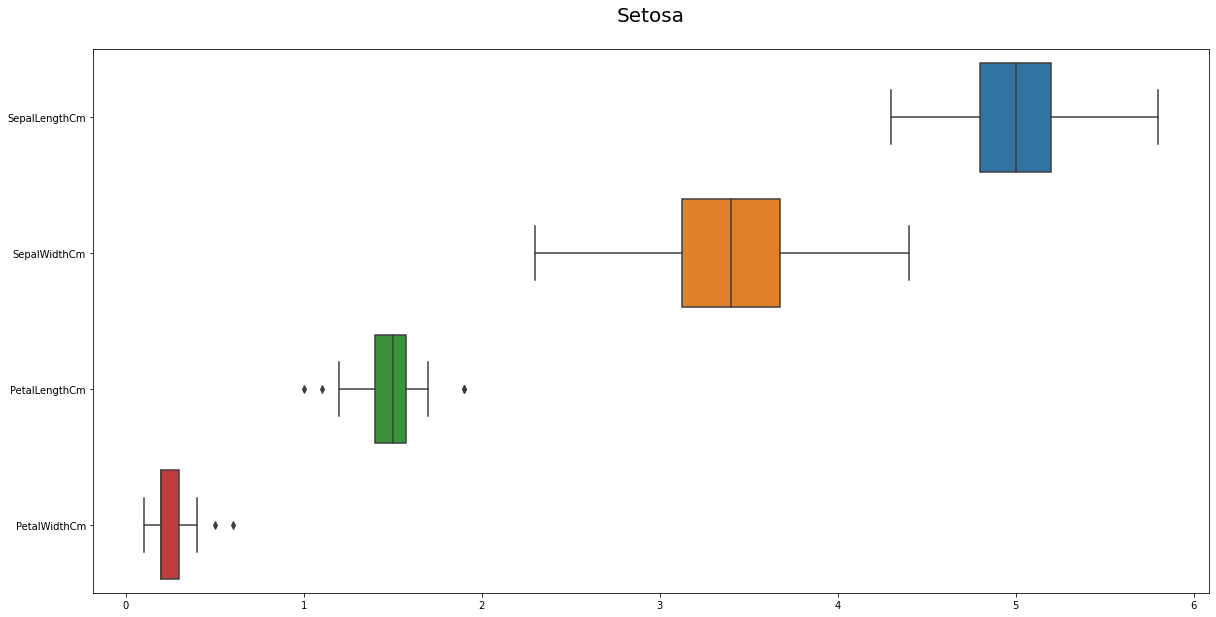

In [534]:
plt.figure(figsize=(20,10))
setosa = df[df['Species'] == "Iris-setosa"]
bp = sns.boxplot(data = setosa, orient="h")
bp.set_title("Setosa\n", fontsize = 20)
plt.show()

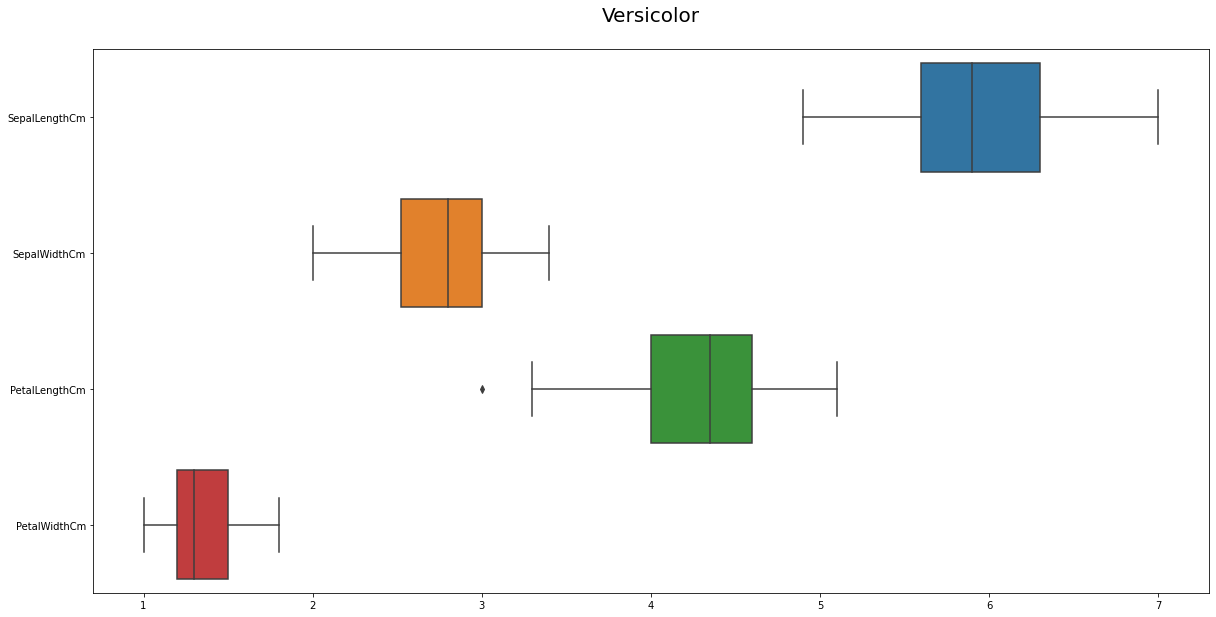

In [535]:
plt.figure(figsize=(20, 10))
versicolor = df[df['Species'] == "Iris-versicolor"]
bp = sns.boxplot(data = versicolor, orient="h")
bp.set_title("Versicolor\n", fontsize = 20)
plt.show()

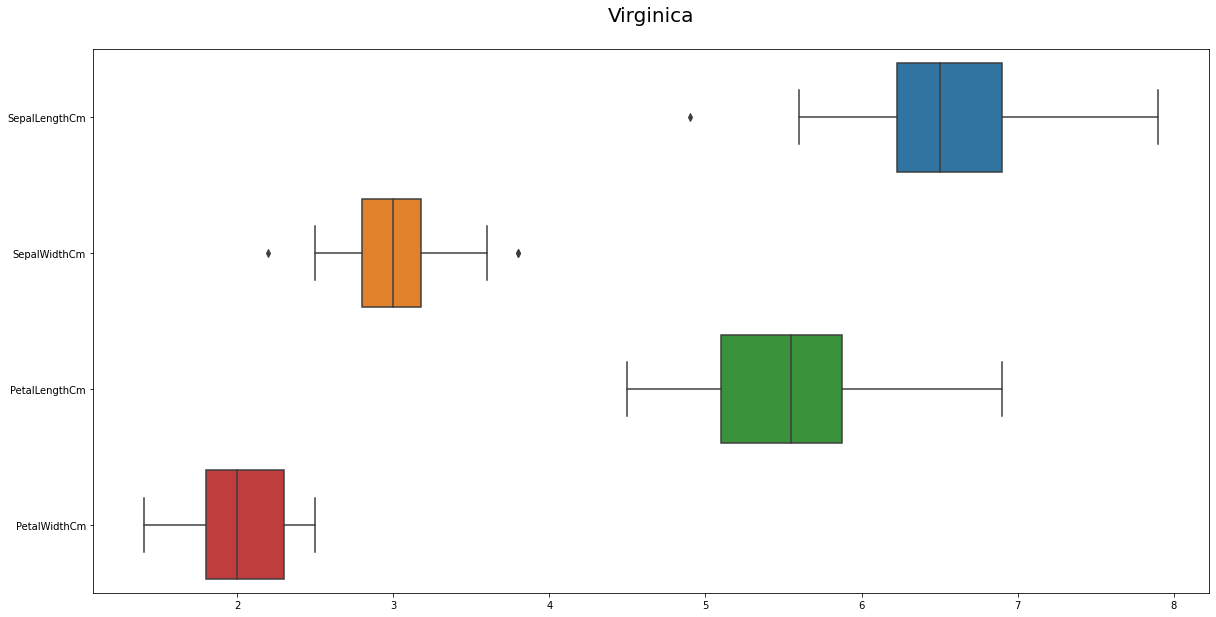

In [536]:
plt.figure(figsize=(20, 10))
virginica = df[df['Species'] == "Iris-virginica"]
bp = sns.boxplot(data = virginica, orient="h")
bp.set_title("Virginica\n", fontsize = 20)
plt.show()

### Histograms

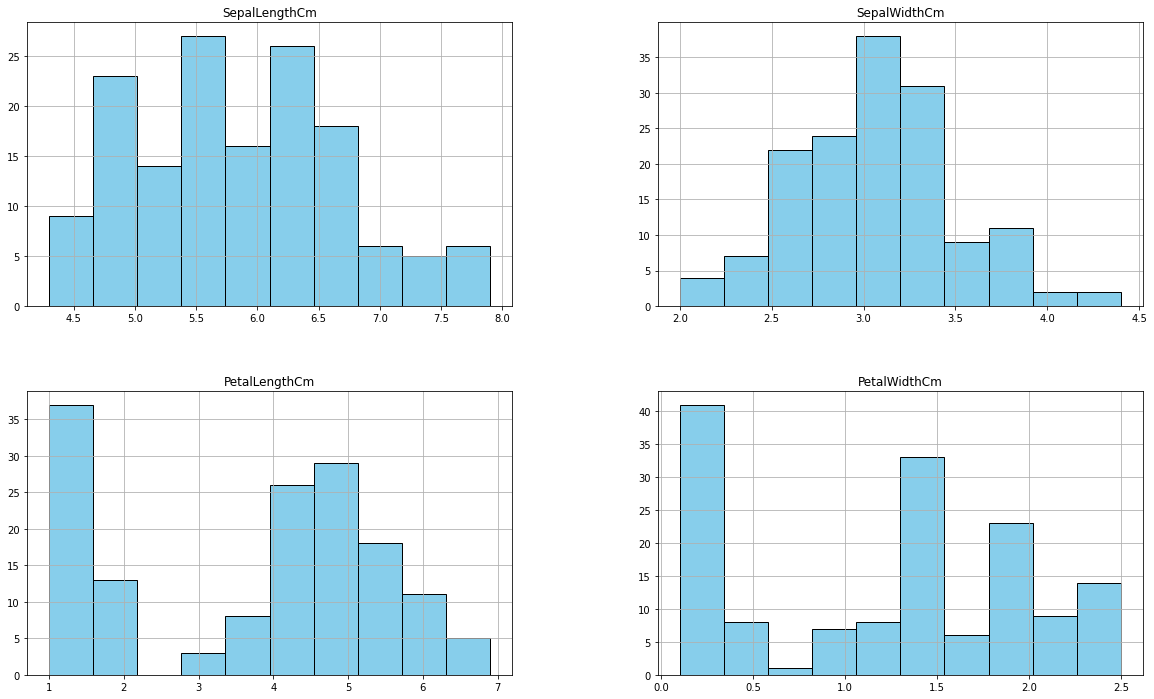

In [537]:
fig = plt.figure(figsize=(20, 12))
df.hist(ax = fig.gca(), color="skyblue", edgecolor="black")
plt.show()

### Scatter Plot

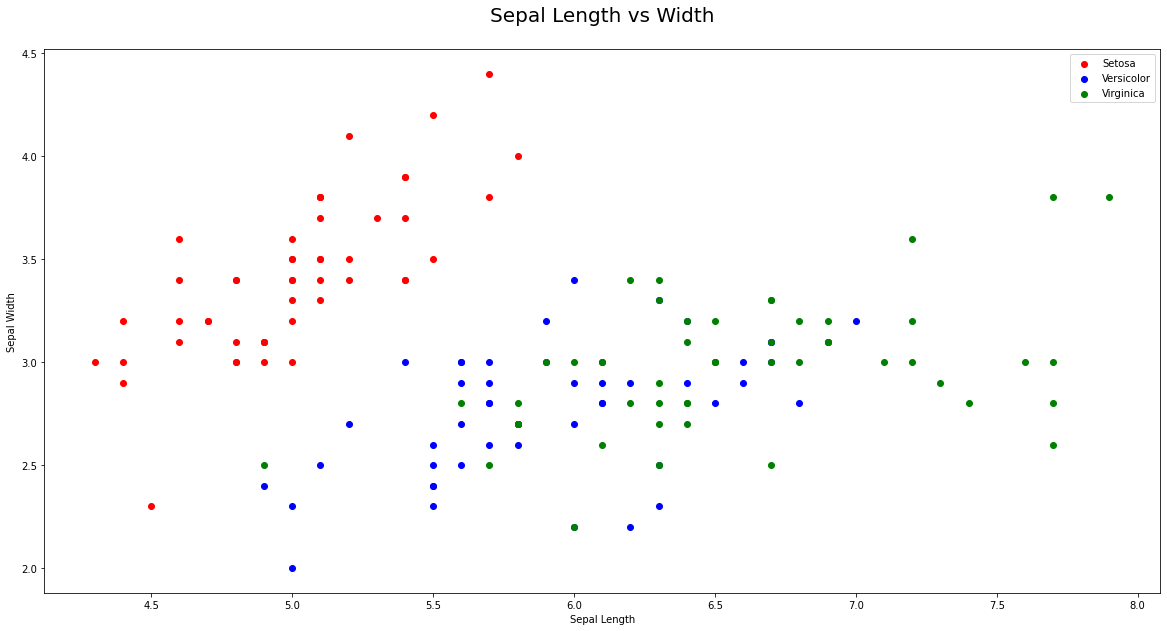

In [538]:
plt.figure(figsize=(20, 10))
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c="red", label="Setosa")
plt.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], c="blue", label="Versicolor")
plt.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], c="green", label="Virginica")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width\n", fontsize=20)
plt.legend()
plt.show()

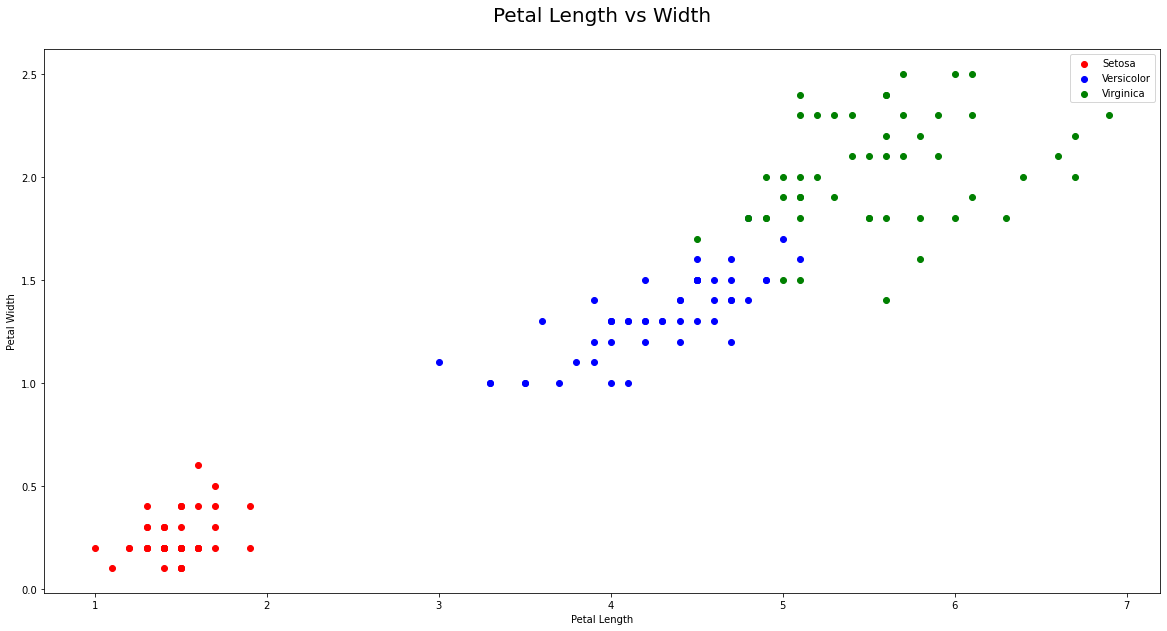

In [539]:
plt.figure(figsize=(20, 10))
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], c="red", label="Setosa")
plt.scatter(versicolor['PetalLengthCm'],versicolor['PetalWidthCm'], c="blue", label="Versicolor")
plt.scatter(virginica['PetalLengthCm'],virginica['PetalWidthCm'], c="green", label="Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Width\n", fontsize=20)
plt.legend()
plt.show()

### Correlation Matrix

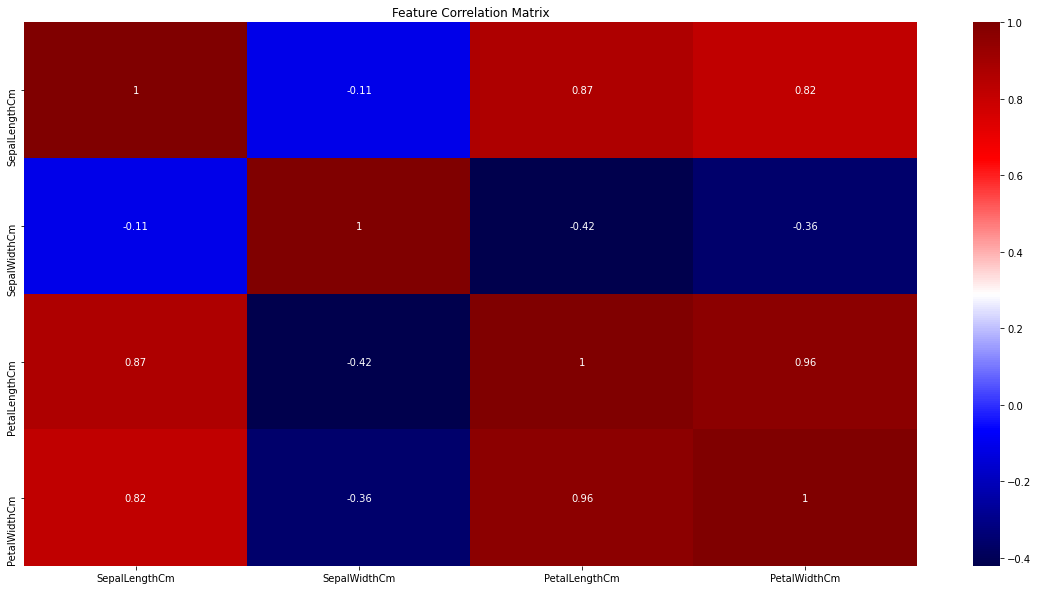

In [540]:
plt.figure(figsize=(20, 10))
corr_mat = df.corr()
cm = sns.heatmap(corr_mat, annot=True, cmap="seismic")
cm.set_title("Feature Correlation Matrix")
plt.show()

## Encoding categorical dependent variable

In [541]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['Species'], 1)
y = df['Species']
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the Dataset into the Training set and Test set

In [542]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Selecting the Models and Metrics

In [543]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [544]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

## Training and Evaluating the Models

In [545]:
models = [lr, knn, svm, nb, dt, rf]
scores = []
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  print("Accuracy of " + type(model).__name__ + " is", accuracy_score(y_test, y_pred))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 0.9333333333333333
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of RandomForestClassifier is 0.9555555555555556


In [546]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': scores})

results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.977778
1     K-Nearest Neighbors  0.977778
2  Support Vector Machine  0.977778
4           Decision Tree  0.955556
5           Random Forest  0.955556
3             Naive Bayes  0.933333
